In [9]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Montar Google Drive
drive.mount('/content/drive')

# Leer el archivo CSV
df = pd.read_csv('/content/drive/My Drive/Beca bootcamp/ds_salaries.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Limpieza de datos con Python:
-Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.
-Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
-Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Junior’, ‘junior’, ‘JUNIOR’).
-Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.
-Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un salario anual de 1 millón de dólares para un puesto de entrada).

In [12]:
#Ver nombre de las columnas
print(df.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [13]:
#Ver informacion completa del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [14]:
#Ver cantidad de columnas y filas del df
df.shape

(3755, 11)

In [17]:
#mostrar si existen valores nulos en el dataframe.
#El resultado demuestra que no existen valores nulos.
df.isna().sum()
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [18]:
#Mostrar valores duplicados
df.duplicated().sum()

1171

In [20]:
filas_duplicadas = df[df.duplicated(keep=False)]
print(filas_duplicadas)

      work_year experience_level employment_type          job_title  salary  \
5          2023               SE              FT  Applied Scientist  222200   
6          2023               SE              FT  Applied Scientist  136000   
9          2023               SE              FT     Data Scientist  147100   
10         2023               SE              FT     Data Scientist   90700   
11         2023               SE              FT       Data Analyst  130000   
...         ...              ...             ...                ...     ...   
3441       2022               SE              FT      Data Engineer  115000   
3502       2021               MI              FT      Data Engineer  200000   
3586       2021               MI              FT      Data Engineer  200000   
3665       2021               MI              FT     Data Scientist   76760   
3709       2021               MI              FT     Data Scientist   76760   

     salary_currency  salary_in_usd employee_reside

In [26]:
# Eliminar filas duplicadas
#La eliminación de los duplicados se realiza porque puede afectar el analisis del promedio y la visualizacion de datos.-
df.drop_duplicates(inplace=True)
# Corroborando si las filas fueron eliminadas
df.duplicated().sum()

0

In [29]:
#Correccion en los tipos de datos con astype y convertir nombres de columnas en minusculas o mayusculas segun sea el caso
#conversion a category y a minusculas
df['experience_level'] = df['experience_level'].str.lower().str.strip().astype('category')
#conversion a category y a minusculas
df['employment_type'] = df['employment_type'].str.lower().str.strip().astype('category')
#conversion a category y a minusculas
df['job_title'] = df['job_title'].str.lower().str.strip().astype('category')
#conversion a category y a mayusculas
df['salary_currency'] = df['salary_currency'].str.upper().str.strip().astype('category')
#conversion a category y a mayusculas
df['employee_residence'] = df['employee_residence'].str.upper().str.strip().astype('category')
#conversion a category y a mayusculas
df['company_location'] = df['company_location'].str.upper().str.strip().astype('category')
#conversion a category y a mayusculas
df['company_size'] = df['company_size'].str.upper().str.strip().astype('category')

#Las columnas work_year, salary, salary_in_usd y remote_ratio no fueron corregidas ya que son tipo enteros.

In [30]:
#mostrando las correcciones
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           2584 non-null   int64   
 1   experience_level    2584 non-null   category
 2   employment_type     2584 non-null   category
 3   job_title           2584 non-null   category
 4   salary              2584 non-null   int64   
 5   salary_currency     2584 non-null   category
 6   salary_in_usd       2584 non-null   int64   
 7   employee_residence  2584 non-null   category
 8   remote_ratio        2584 non-null   int64   
 9   company_location    2584 non-null   category
 10  company_size        2584 non-null   category
dtypes: category(7), int64(4)
memory usage: 127.9 KB


In [33]:
# Agrupando las columnas experience_level y salary in usd y calcular el promedio de los salarios
salario_por_experiencia = df.groupby('experience_level', observed=False)['salary_in_usd'].mean()
print(salario_por_experiencia)
#Segun el resultado, no hay inconsistencias en los salarios. El promedio de los salarios son equivalentes a los puestos y nivel de experiencia. (entry, mid, senior y expert).

experience_level
en     72648.685185
ex    191078.208333
mi    101828.783133
se    153897.435650
Name: salary_in_usd, dtype: float64


In [35]:
#Agrupando con "groupby" exp level y salary in usd, utilizando describe para ver las estadisticas descriptivas, en especial el min y max de los salarios segun el nivel de experiencia.
salario_descripcion = df.groupby('experience_level', observed=True)['salary_in_usd'].describe()
print(salario_descripcion)
#Se encuentran datos anómalos en el min y maximo del nivel de exp "en", un minimo de 5409 y max de 300000.

                   count           mean           std      min        25%  \
experience_level                                                            
en                 270.0   72648.685185  51630.629202   5409.0   31890.00   
ex                  96.0  191078.208333  71003.538826  15000.0  144211.50   
mi                 664.0  101828.783133  56825.125520   5132.0   62486.75   
se                1554.0  153897.435650  60450.013666   8000.0  112000.00   

                       50%       75%       max  
experience_level                                
en                 61900.0  100000.0  300000.0  
ex                189618.5  235000.0  416000.0  
mi                 95000.0  134000.0  450000.0  
se                148800.0  190150.0  423834.0  


In [37]:
#Agrupando 'experience_level', 'job_title' para observar la estadistica descriptiva del salario en usd, utilizando agg.
salario_por_titulo = df.groupby(['experience_level', 'job_title'], observed=True).agg(
    count=('salary_in_usd', 'count'),
    mean=('salary_in_usd', 'mean'),
    std=('salary_in_usd', 'std'),
    min=('salary_in_usd', 'min'),
    max=('salary_in_usd', 'max')
).reset_index()

# Mostrar los resultados
print(salario_por_titulo)

#Se puede observar que el desarrollador de inteligencia artificial, posee mayor variabilidad en los salarios. Su desviación estandar es de 107945.8.
#Segun este analisis agrupado, el AI developer puede tener el salario más alto e implica una alta demanda.-
#Por otra parte se observa que en la desviacion estandar, hay NaN en ciertas filas.-

    experience_level                      job_title  count           mean  \
0                 en  3d computer vision researcher      2   35000.000000   
1                 en                   ai developer      6  130884.500000   
2                 en                  ai programmer      2   55000.000000   
3                 en                   ai scientist      7   52781.285714   
4                 en             analytics engineer      1  130000.000000   
..               ...                            ...    ...            ...   
187               se         product data scientist      1    8000.000000   
188               se              research engineer     22  174773.181818   
189               se             research scientist     34  171229.588235   
190               se         software data engineer      1   50000.000000   
191               se           staff data scientist      1  105000.000000   

               std     min     max  
0     21213.203436   20000   50000  
1

In [38]:
# Se procede a filtrar los datos nulos representados en std porque pueden afectar en la visualizacion del df.-
salario_con_std = salario_por_titulo[salario_por_titulo['std'].notna()]
print(salario_con_std)

    experience_level                      job_title  count           mean  \
0                 en  3d computer vision researcher      2   35000.000000   
1                 en                   ai developer      6  130884.500000   
2                 en                  ai programmer      2   55000.000000   
3                 en                   ai scientist      7   52781.285714   
5                 en         applied data scientist      3   66679.000000   
..               ...                            ...    ...            ...   
181               se                   nlp engineer      4  205000.000000   
184               se        principal data engineer      2  192500.000000   
185               se       principal data scientist      6  169728.166667   
188               se              research engineer     22  174773.181818   
189               se             research scientist     34  171229.588235   

               std     min     max  
0     21213.203436   20000   50000  
1

Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

**# Visualizaciones exploratorias univariadas:**

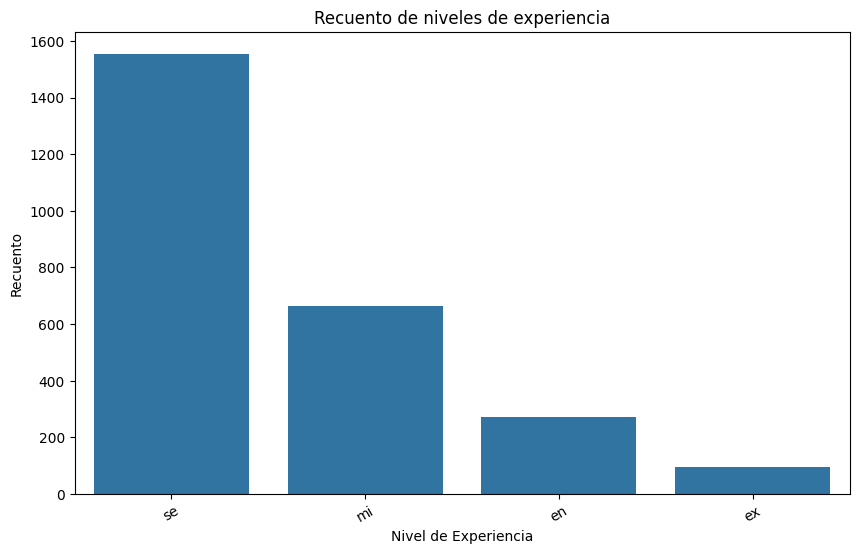

In [40]:
plt.figure(figsize=(10, 6))

# Gráfico de barras para el conteo de niveles de experiencia
sns.countplot(data=df, x='experience_level', order=df['experience_level'].value_counts().index)
plt.title('Recuento de niveles de experiencia')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Recuento')
plt.xticks(rotation=30)
plt.show()
#El grafico de barras muestra que segun el recuento de niveles de experiencia, hay un mayor numero de Seniors, seguido de Mid level,
#entry level y por ultimo experto.
#Podemos inferir que hay mayor cantidad de Senior level y menor cantidad de expertos o executive en el mercado.-

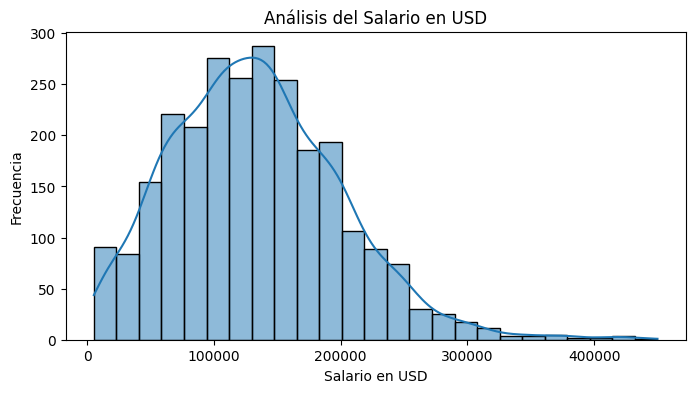

In [46]:
#Histograma del Salario en USD
plt.figure(figsize=(8, 4))
sns.histplot(df['salary_in_usd'], bins=25, kde=True)
plt.title('Análisis del Salario en USD')
plt.xlabel('Salario en USD')
plt.ylabel('Frecuencia')
plt.show()
#El histograma demuestra que la mayoría de los salarios se agrupan en un rango de 20.000 a 150.000 USD.
#Se registran pocos salarios muy altos.

**Visualizaciones exploratorias multivariadas:**

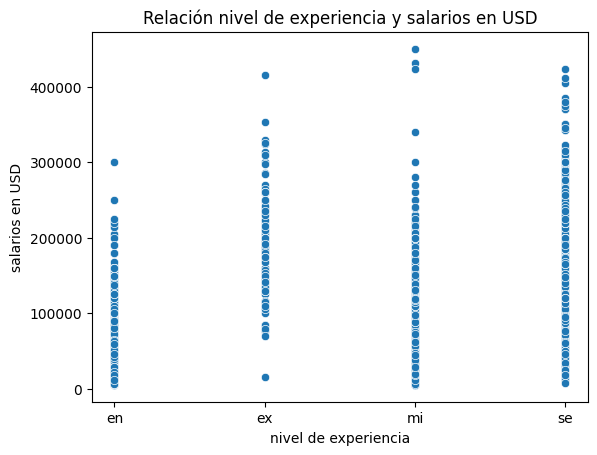

In [56]:
#grafico de dispersion entre el nivel de experiencia y el salario en USD
sns.scatterplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Relación nivel de experiencia y salarios en USD')
plt.xlabel('nivel de experiencia')
plt.ylabel('salarios en USD')
plt.show()

#Se puede observar que los salarios más bajos son los de nivel más bajo de experiencia (entry level).
#El nivel senior experimenta un alto grado de variabilidad salarial debido que posee una cantidad mayor de puestos laborales.-
#En el nivel mid se puede observar salarios anómalos, lo que puede corresponder a salarios de cargos con alta demanda.-

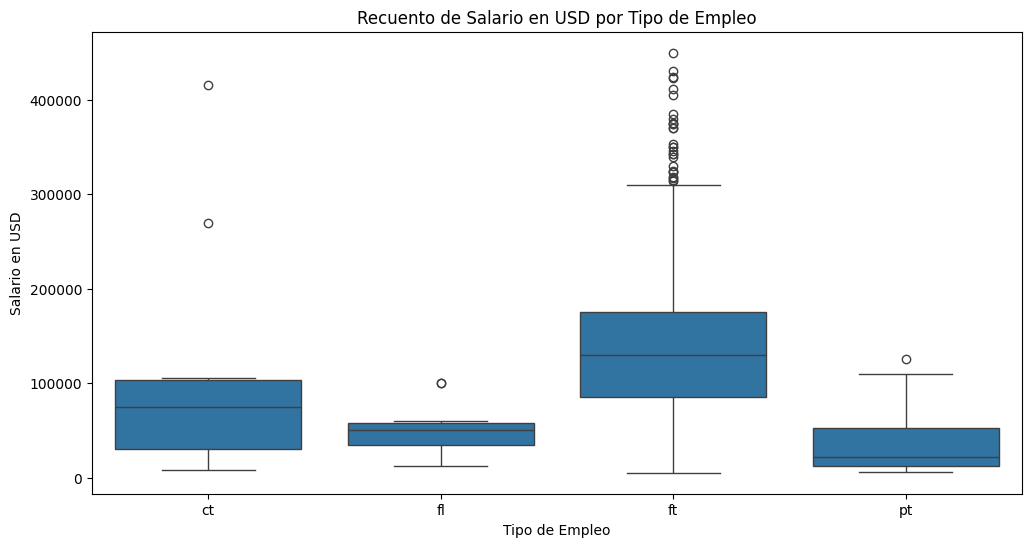

In [61]:
#Boxplot para comparar el tipo de empleo vs salarios en USD
plt.figure(figsize=(12, 6))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.title('Recuento de Salario en USD por Tipo de Empleo')
plt.xlabel('Tipo de Empleo')
plt.ylabel('Salario en USD')
plt.show()

#Podemos observar que el tipo de empleo Ft (Full-time, tiempo completo) posee el nivel salarial más alto.
#Tambien posee la media salarial más alta.
#Los freelancers tiene el salario más bajo con respecto a todos los otros, seguido de los part-time(a tiempo parcial) y los contratados.-

**Conclusión:**
Los datos demuestran que a mayor nivel de experiencia laboral, mayor será el salario. Los roles juegan un papel importante en materia salarial ya que ciertos cargos, poseen mayor demanda lo que conlleva a un salario más elevado, independientemente del nivel de experiencia, tal es el caso de los desarrolladores de IA.
Otro aspecto importante es la relación salario y horario laboral; existiendo una tendencia justa. Más horas trabajadas equivale a mayor salario.-

Aclaro que utilicé recursos de las clases de ayudantía..Muchas gracias!